In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [33]:
base_dir = "/media/hdd01/sklee/"
cell_type = "CA1"
experiment = "clust4-60"
model_type = "alpha_rootspike"
E_no = 2000

E_file = "Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
ref = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_file)[:,0].astype(int)
order_idx = np.argsort(ref)
ref = ref[order_idx]

In [34]:
seven_raw = np.load(base_dir+cell_type+"_"+experiment+"/greedy/"+model_type+"_sub6-1_output.npz")["C_syn_e"][:,order_idx]
seven = np.zeros((E_no))
for i in range(E_no):
    seven[i] = np.argmax(seven_raw[:,i])
    
four_raw = np.load(base_dir+cell_type+"_"+experiment+"/greedy/"+model_type+"_sub4-0_output.npz")["C_syn_e"][:,order_idx]
four = np.zeros((E_no))
for i in range(E_no):
    four[i] = np.argmax(four_raw[:,i])
    
three_raw = np.load(base_dir+cell_type+"_"+experiment+"/greedy/"+model_type+"_sub5-3_output.npz")["C_syn_e"][:,order_idx]
three = np.zeros((E_no))
for i in range(E_no):
    three[i] = np.argmax(three_raw[:,i])

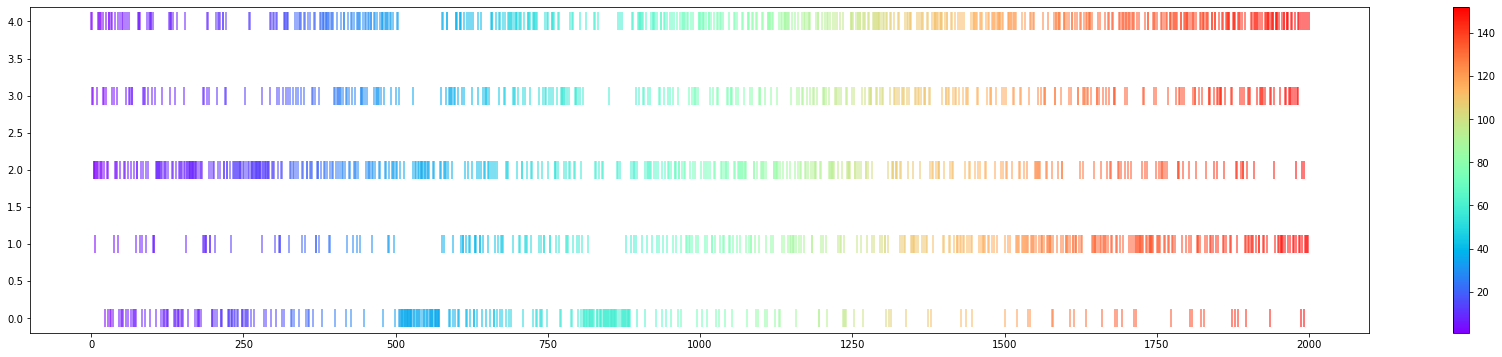

In [35]:
plt.figure(figsize = (30,6))
cmap = matplotlib.cm.get_cmap('rainbow')
norm = matplotlib.colors.Normalize(vmin=np.min(ref),vmax=np.max(ref))

for i in range(np.max(ref)):
    c_val = norm(i+1)
    idx = np.where(ref == i+1)[0]
    plt.scatter(idx, three[idx], color=cmap(c_val), s=300, alpha=0.7, marker="|", linewidth=1.5)

plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.show()
print()
#plt.savefig(base_dir+cell_type+"_"+experiment+"/greedy/greedy_smooth_sub4_CsynE.png", bbox_inches='tight', dpi=200, facecolor='w')

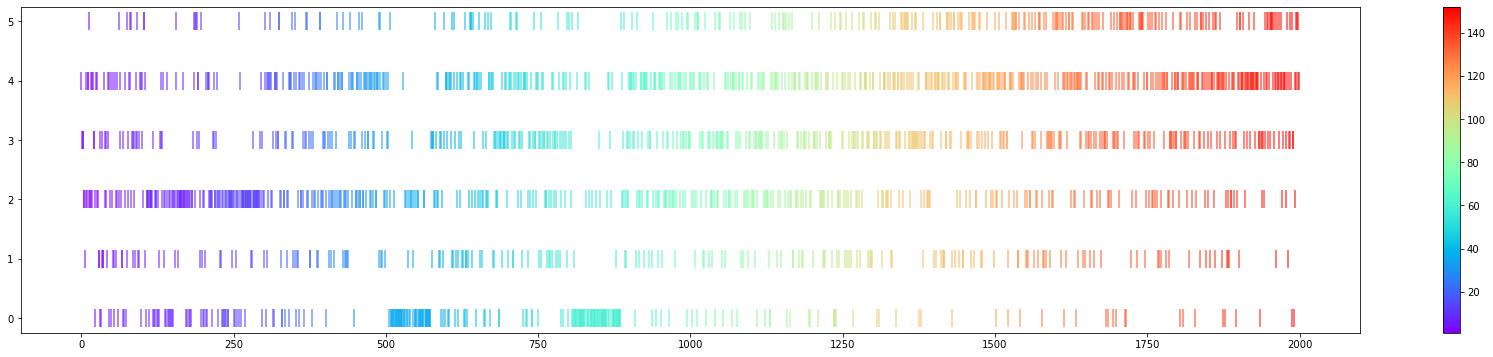

In [36]:
plt.figure(figsize = (30,6))
cmap = matplotlib.cm.get_cmap('rainbow')
norm = matplotlib.colors.Normalize(vmin=np.min(ref),vmax=np.max(ref))

for i in range(np.max(ref)):
    c_val = norm(i+1)
    idx = np.where(ref == i+1)[0]
    plt.scatter(idx, seven[idx], color=cmap(c_val), s=300, alpha=0.7, marker="|", linewidth=1.5)

plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.show()
#plt.savefig(base_dir+cell_type+"_"+experiment+"/greedy/greedy_sub7_CsynE.png", bbox_inches='tight', dpi=200, facecolor='w')

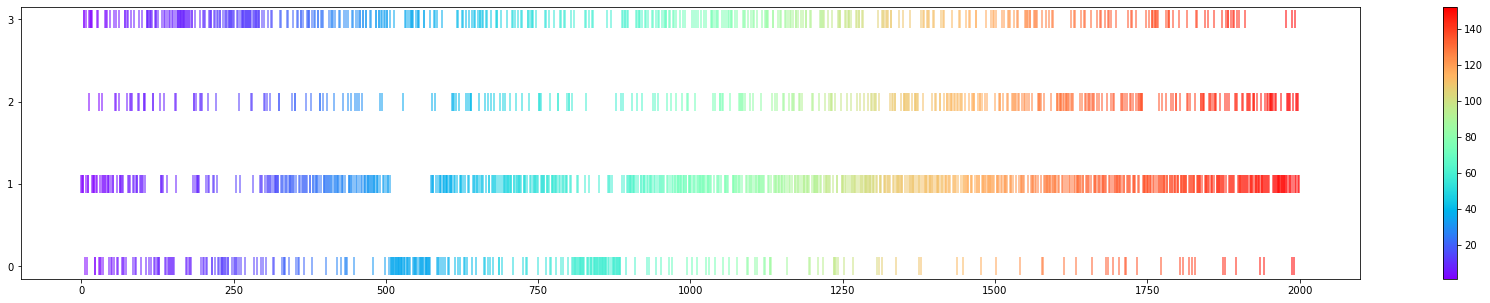

In [6]:
plt.figure(figsize = (30,5))
cmap = matplotlib.cm.get_cmap('rainbow')
norm = matplotlib.colors.Normalize(vmin=np.min(ref),vmax=np.max(ref))

for i in range(np.max(ref)):
    c_val = norm(i+1)
    idx = np.where(ref == i+1)[0]
    plt.scatter(idx, four[idx], color=cmap(c_val), s=300, alpha=0.7, marker="|", linewidth=1.5)

plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.yticks([0,1,2,3])
plt.show()
#plt.savefig(base_dir+cell_type+"_"+experiment+"/greedy/greedy_sub4_CsynE.png", bbox_inches='tight', dpi=200, facecolor='w')